In [2]:
import os, sys
import json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Simulation
* Simulate RL data from two different distributions, see if we can quantify difference

In [23]:
# Generate gamma distribution
shape, scale = 2., 1. 
gamma_dist = np.random.gamma(shape, scale, 1000)

In [24]:
# Generate gamma distribution
mu, sigma = 0, 0.1 # mean and standard deviation
normal_dist = np.random.normal(mu, sigma, 1000)

/Users/aishwaryamandyam/anaconda3/envs/research/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aishwaryamandyam/anaconda3/envs/research/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


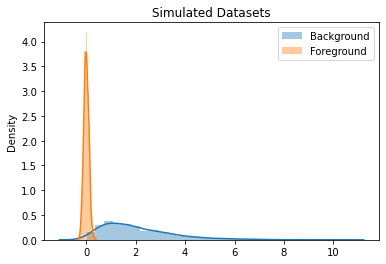

In [26]:
plt.title("Simulated Datasets")
sns.distplot(gamma_dist, label='Background')
sns.distplot(s, label='Foreground')
plt.legend()
plt.show()

# Construct a state-action space
* There are 2 actions, and a state representation that has 10 features. 
* A simulated chartFrame has both the features and the actions. 
* Then, the actions + states are combined into a transition. Transition includes state, action, next state, reward, and phi (the unweighted reward)
* Make the action a treatment

In [3]:
covid_data = pd.read_csv("/tigress/BEE/penn-covidsub/wip-state_rep_all_feat_24H.csv")
covid_data

,Unnamed: 0,C WHOLE BLOOD GLUCOSE,AST (ASPARTATE AMINOTRANSFERASE),C HCO3 ART,C CARBON DIOXIDE,ANION GAP,C MCH,C PHOSPHORUS,RBC (CCH),GLUCOSE (CCH),...,Antidiabetic Combinations,Vasopressin Receptor Antagonists,Carbapenems,Agents for Chemical Dependency,Proprotein Convertase Subtilisin/Kexin Type 9 Inhibitors,Hematorheologic Agents,Rectal Local Anesthetics,Antihistamine Hypnotics,Anorexiants Non-Amphetamine,is_deceased_next_t
0,3,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,342.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,5,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,127.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,6,281.00,281.00,281.00,281.00,281.00,281.00,281.00,281.00,281.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,13,141.00,141.00,141.00,141.00,141.00,141.00,141.00,141.00,141.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,21,56.00,56.00,56.00,56.00,56.00,56.00,56.00,56.00,56.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
5,22,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
6,23,14.30,14.30,14.30,14.30,14.30,14.30,14.30,14.30,14.30,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
7,25,5.70,5.70,5.70,5.70,5.70,5.70,5.70,5.70,5.70,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
8,32,117.00,117.00,117.00,117.00,117.00,117.00,117.00,117.00,117.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
9,44,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [6]:
features = covid_data.columns
for f in features:
    print(str(f))

Unnamed: 0
C WHOLE BLOOD GLUCOSE
AST (ASPARTATE AMINOTRANSFERASE)
C HCO3 ART
C CARBON DIOXIDE
ANION GAP
C MCH
C PHOSPHORUS
RBC (CCH)
GLUCOSE (CCH)
C WHITE BLOOD CELLS
ALBUMIN (CCH)
C INDIRECT BILI
C ESTIMATED GFR NON-AA
C FIO2 ARTERIAL
C SODIUM
C CREATININE
CULTURE (CCH)
C MCV
C UA SPECIFIC GRAVITY
UREA NITROGEN
C BILIRUBIN, DIRECT
C HEMATOCRIT
WBC (CCH)
C BASE EXCESS
C # BASOPHILS (AUTO)
C ALKALINE PHOSPHATASE
TOTAL PROTEIN (CCH)
PATIENT TEMPERATURE
PH VEN
PT (PROTHROMBIN TIME)
C RDW
C PO2 VEN
C % LYMPHOCYTES (MANUAL)
C POTASSIUM
Q-T INTERVAL
C METHGB VENOUS
PH ART
PH(T)
C ABL SPEC ART
T AXIS
GLUCOSE
LACTIC ACID
C PLATELETS
TROPONIN I - HIGH SENSITIVITY
MAGNESIUM
PO2 ART
C CHLORIDE
C RED BLOOD CELLS
C MACROCYTES
QRS AXIS
PCO2 ART
C CALCIUM
C % NEUTROPHILS
C MCHC
C % LYMPHOCYTES
C % BASOPHILS (MANUAL)
URIC ACID (CCH)
RR POC
C UA GLUCOSE
C % EOSINOPHILS
PCO2 VEN TEMP CORRECTED
TIDAL VOLUME POC
C CHLORIDE ART
C % MONOCYTES (MANUAL)
CARBOXYHEMOGLOBIN
C HSPEC
C HCT ARTERIAL
C # MONOCYTES (